# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luna McBride"
COLLABORATORS = ""

---

In [2]:
# Necessary imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
from sklearn.datasets import load_breast_cancer
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

In [4]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Part 1: (45 pts) Entropy, information gain

For all the questions in this part, consider that the features are binary and the label is binary as well.

### (5 pts) Question 1: Entropy

Entropy is a measure of the impurity or disorder of a dataset. For a binary classification problem, the entropy of a dataset $ D $ is given by:

$$
H(D) = - p_+ \log_2 p_+ - p_- \log_2 p_-
$$

Where:
- $ p_+ $ is the proportion of positive examples in $ D $.
- $ p_- $ is the proportion of negative examples in $ D $.

If $ p_+ $ or $ p_- $ is $ 0 $, their respective term in the equation is considered to be $ 0 $ (since the logarithm of $ 0 $ is undefined).

**Task:**

Your task is to implement the entropy function based on the provided formula. Make sure to handle the edge cases where $ p_+ $ or $ p_- $ are $ 0 $.

- Hint: Sometimes, you need to accept an empty set (`len(target) == 0`), and you should return 0 entropy

In [5]:
def entropy(target: np.ndarray) -> float:
    """
    Compute the entropy of a dataset.
    
    Parameters:
    - target: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - H: A float representing the entropy of the dataset.
    """
    
    # YOUR CODE HERE
    H = 0.0 #Set a baseline for the entropy value
    
    #If there are no values to check (ie, there are no positive nor negative values), return 0
    if len(target) == 0:
        return H #Return the default H of H=0
    
    positive = 0 #Initialize a counter for the number of positive entries
    negative = 0 #Initialize a counter for the number of negative entries
    number = len(target) #Get the length as the number of total entries
    
    #For each element, add to positive if positive and add to negative if negative
    for element in target:
        
        #If the element is positive, add to positive
        if element == 1:
            positive += 1 #Add one to positive, as to count the number of positive entries
        
        #If the element is not positive, add to negative
        else:
            negative += 1 #Add one to negative
            
    positive = positive/number #Divide by the total number to get the proportion of positives
    negative = negative/number #Divide by the total number to get the proportion of negatives
    
    #If there are no positives, just calculate negative.
    if positive == 0:
        H = -1 * negative * np.log2(negative) #Calculate the entropy for just the negative values
    
    #If there are no negatives, just calculate positive.
    elif negative == 0:
        H = -1 * positive * np.log2(positive) #Calculate the entropu for jusy positive values
        
    #If there are both positive and negative values, compute the entropy properly
    else:
        H = (-1 * positive * np.log2(positive)) - (negative * np.log2(negative)) #Compute the entropu by the given equation
    
    return H #Return the entropy value

In [6]:
# some examples
entropy(np.array([0, 1, 1]))

0.9182958340544896

In [7]:
entropy(np.array([0]))

-0.0

In [8]:
# Test with a balanced dataset
y_test_1 = np.array([0, 1, 0, 1])
assert np.isclose(entropy(y_test_1), 1.0, atol=1e-5), "Test Case 1 Failed"
# Test with all negative examples
y_test_2 = np.array([0, 0, 0, 0])
assert np.isclose(entropy(y_test_2), 0.0, atol=1e-5), "Test Case 2 Failed"
# Test with all positive examples
y_test_3 = np.array([1, 1, 1, 1])
assert np.isclose(entropy(y_test_3), 0.0, atol=1e-5), "Test Case 3 Failed"

## (10 pts) Question 2: Information Gain

Information Gain (IG) is a measure of the effectiveness of an attribute in classifying the training data. It calculates the difference between the entropy of the dataset before the split and the weighted entropy of each branch after the split. The formula for computing IG is given by:

$$
IG(D, A) = H(D) - \sum_{v \in A} \left( \frac{|D_v|}{|D|} \times H(D_v) \right)
$$

Where:
- $ H(D) $ is the entropy of the dataset.
- $ A $ is the attribute or feature column we're considering.
- $ D_v $ is the subset of data for which attribute $ A $ has value $ v $.
- $ |D_v| $ is the number of samples in $ D_v $.
- $ |D| $ is the total number of samples.

**Task:**

Write a function `information_gain` to solve the problem.

Hint:
1. Start by computing the entropy of the dataset before the split.
2. Next, compute the weighted entropy of each branch after the split based on the feature column $x_j \leq v$ 
3. Return the difference between the initial entropy and the weighted sum of branch entropies.

In [9]:
def information_gain(X: np.ndarray, y: np.ndarray, j: int, v: float) -> float:
    """
    Compute the information gain of splitting the data based on feature column j.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    - j: An integer representing the target feature column index (0-indexed).
    - v: A floating point containing the value by which this column will be split
    
    Returns:
    - IG: A float representing the information gain of the split based on feature column j.
    """    
    # YOUR CODE HERE
    entropyAllData = entropy(y) #Get the entropy on all of the data
    
    combinedXY = list(zip(X, y)) #Combining X and y so they stay connected, even through any subsets or randomization
    #I learned this I do not know how many years ago at this point, but it is still one of the best ways to make sure that xy connection is not lost
    
    Xlower = [] #Initialize a list for the x values of the lower than v split
    ylower = [] #Initialize a list for the y values of the lower than v split
    Xupper = [] #Initialize a list for the x values of the higher than v split
    yupper = [] #Initialize a list for the y values of the higher than v split
    
    #For each features and y value pair, determine if it is part of the lower or upper split
    for Xvalue, yvalue in combinedXY:
        
        #If the value selected is less than or equal to v, add it to the lower lists "based on the feature column  𝑥𝑗≤𝑣"
        if Xvalue[j] <= v:
            Xlower.append(Xvalue) #Add the x features to the lower x list
            ylower.append(yvalue) #Add the y value to the lower y list
        
        #If the value selected is strictly greater than v, add it to the upper lists
        else:
            Xupper.append(Xvalue) #Add the x features to the upper x list
            yupper.append(yvalue) #Add the y value to the upper y list
    
    lowerHalfSum = (len(Xlower)/len(X)) * entropy(ylower) #Get the len dv / len x * entropy for the lower than v values
    upperHalfSum = (len(Xupper)/len(X)) * entropy(yupper) #Get the len dv / len x * entropy for the higher than v values
    
    IG = entropyAllData - lowerHalfSum - upperHalfSum #Calculate the overall summation from the equation above
    
    return IG #Return the summation

In [10]:
entropy(y_test_2)

-0.0

In [11]:
# try your function here

In [12]:
""" (10 pts) """
# Test Case 1: Binary Feature
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
# Given that the threshold doesn't matter for binary features, we can still provide one
assert np.isclose(information_gain(X_test_1, y_test_1, 1, 0.5), 1.0, atol=1e-5), "Test Case 1 Failed"

# Test Case 2: Continuous Feature
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
# Here, the threshold matters; we're checking the information gain when the split is made at 1.0 for feature 1
assert np.isclose(information_gain(X_test_2, y_test_2, 1, 1.0), 1.0, atol=1e-5), "Test Case 2 Failed"

# Test Case 3: Another Continuous Feature
X_test_3 = np.array([
    [0.5, 1.5, 2.5],
    [1.5, 0.5, 2.5],
    [2.5, 1.5, 1.5],
    [0.5, 0.5, 0.5]
])
y_test_3 = np.array([0, 1, 0, 1])
# Checking the information gain for a split made at 2.0 for feature 2
expected_IG_3 = 0.31127812445913283
assert np.isclose(information_gain(X_test_3, y_test_3, 2, 1.0), expected_IG_3, atol=1e-5), "Test Case 3 Failed"

### (10 pts) Question 3: Create a Function Representing a "Decision Stump"

A decision stump is a decision tree with just one split. It makes a decision based on whether a feature \(j\) is less than or equal to a value \(v\), and returns a specified value if the condition is met.

**Task:**

Write a function `create_decision_stump` with the following signature:

```python
def create_decision_stump(j: int, threshold: float, return_value: int) -> Callable[[np.ndarray], np.ndarray]:
    """
    Create a decision stump based on feature column j, a threshold value, and a specified return value if 
    the condition is met.
    
    Parameters:
    - j: An integer representing the feature column index (0-indexed) to base the decision on.
    - threshold: A float representing the threshold value to decide the split.
    - return_value: An integer (0 or 1) to return when the feature column value is less than or equal to the threshold.
    
    Returns:
    - decision_stump: A function that takes in a 2D numpy array and returns a 1D numpy array
                      with predictions, returning the specified value if the feature column value is less than or 
                      equal to the threshold, and the opposite value otherwise.
    """
    pass
```

In [13]:
from typing import Callable

def create_decision_stump(j: int, threshold: float, return_value: int) -> Callable[[np.ndarray], np.ndarray]:
    """
    Create a decision stump based on feature column j, a threshold value, and a specified return value if 
    the condition is met.
    
    Parameters:
    - j: An integer representing the feature column index (0-indexed) to base the decision on.
    - threshold: A float representing the threshold value to decide the split.
    - return_value: An integer (0 or 1) to return when the feature column value is less than or equal to the threshold.
    
    Returns:
    - decision_stump: A function that takes in a 2D numpy array and returns a 1D numpy array
                      with predictions, returning the specified value if the feature column value is less than or 
                      equal to the threshold, and the opposite value otherwise.
    """
    
    def decision_stump(x):
        """
        Create a decision stump based the values in the external function and an additional pass-in x.
    
        Parameters:
        - x: a list of features from which to follow the j, threshold, and return_value rules from the external function
    
        Returns:
        - returnValues: a list of outputs to be expected from the stump for each feature list in x
        """
        returnValues = [] #Create the returnValues list
        
        #For each set of values in x, check the specified j and threshold values and append the appropriate return value
        for values in x:
            #If the value at the specified j is less than or equal to the threshold, append the return value
            if values[j] <= threshold:
                returnValues.append(return_value) #Append the return value to the returnValues list
                
            #If the value at the specified j is strictly greater than the threshold, apply the opposite of the return value
            else:
                returnValues.append(int(not return_value)) #Append the opposite of the return value (1->0, 0->1)
        
        return returnValues #Return the return values
        
    
    return decision_stump

In [14]:
# try it here

In [15]:
"""(10 pts) Some tests"""
# Test Case 1: Binary Feature
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
# Here, we expect all values less than or equal to 0 to be classified as 1, and others as 0
stump_1 = create_decision_stump(0, 0, 1)
assert np.array_equal(stump_1(X_test_1), np.array([1, 0, 0, 1])), "Test Case 1 Failed"

# Test Case 2: Continuous Feature
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
# We're checking the predictions when the split is made at 1.0 for feature 1
# Values less than or equal to 1.0 should be classified as 0, and others as 1
stump_2 = create_decision_stump(1, 1.0, 0)
assert np.array_equal(stump_2(X_test_2), np.array([1, 0, 1, 0])), "Test Case 2 Failed"

# Test Case 3: Another Continuous Feature
X_test_3 = np.array([
    [0.5, 1.5, 2.5],
    [1.5, 0.5, 2.5],
    [2.5, 1.5, 1.5],
    [0.5, 0.5, 0.5]
])
# Checking the predictions for a split made at 2.0 for feature 2
# Values less than or equal to 2.0 should be classified as 0, and others as 1
stump_3 = create_decision_stump(2, 2.0, 0)
assert np.array_equal(stump_3(X_test_3), np.array([1, 1, 0, 0])), "Test Case 3 Failed"

### (10 pts) Question 4: Best Feature to Split By

Using the previously defined `information_gain` function that now takes a threshold as a parameter, your task is to find the best feature and threshold to split the data on. Specifically, you should identify the feature and threshold that provides the highest information gain when used as a decision stump.

**Task:**

Write a function `best_feature_to_split` with the following signature:

```python
def best_feature_to_split(X: np.ndarray, y: np.ndarray) -> Tuple[int, float]:
    """
    Identify the best feature and threshold to split the dataset on based on information gain.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - j_best: An integer representing the index (0-indexed) of the best feature column to split on.
    - v_best: A float representing the best threshold to split the feature by.
    """
    pass
```

In [16]:
from typing import Tuple

def best_feature_to_split(X: np.ndarray, y: np.ndarray) -> Tuple[int, float]:
    """
    Identify the best feature and threshold to split the dataset on based on information gain.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - j_best: An integer representing the index (0-indexed) of the best feature column to split on.
    - v_best: A float representing the best threshold to split the feature by.
    """
    
    # YOUR CODE HERE
    minValue = 20000000000000000 #Set an arbitrarily large min value to not potentially overlap with actually small min values
    maxValue = -20000000000000000 #Set an arbitrarily small max value to not potentially overlap with actually large max values
    
    #For each set of values, find the min and max. If they are the global min or max, update the global min or max respectively
    for values in X:
        
        #If the min in this set is the actual min, set the min value to the new minimum
        if min(values) < minValue:
            minValue = min(values) #Set the min value to the new minimum
            
        #If the max in this set is the actual max, set the max value to the new maximum
        if max(values) > maxValue:
            maxValue = max(values) #Set the max value to the new maximum
            
    #For each item in the range min*10 to max*10 (since range only works with whole numbers and all values so far have been to
    #  one decimal place), divide it by 10 to fit it back into the proper single decimal place value. The minimum and maximum
    #  values are used here to ensure the thresholds are properly limited between the possible values in the set.
    thresholds = [item/10 for item in list(range(int(minValue*10), int(maxValue*10)))]
    features = range(0, len(X[0])) #Create a feature list for the length of possible features
    
    j_best = -1 #Initialize the best feature to -1, as no feature has been selected yet
    v_best = -200000000000000000 #Initialize the best threshold to an arbitrarily small number so it cannot be mistaken for an actual threshold
    informationGain = -100000000000 #Initialize the information gain to an arbitrarily small number to to overlap with actual gains
    
    #For each feature and each threshold, check the information gain to determine the best
    for feature in features:
        
        #For each threshold and feature, check the information gain to determine the best
        for threshold in thresholds:
            gain = information_gain(X, y, feature, threshold) #Get the gain of the current feature/threshold pair
            
            #If this gain is better than the current best gain, update the gain along with the current best values
            if gain > informationGain:
                informationGain = gain #Update the best gain to the current gain
                v_best = threshold #Update the best threshold to the current threshold
                j_best = feature #Update the best feature to the current feature
    
    return j_best, v_best #Return the best feature and threshold

In [17]:
# try it here
# Why wouldn't I use one of the tests to test the values? it is clearly stated in the test what this should be
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
best_feature_1, best_threshold_1 = best_feature_to_split(X_test_1, y_test_1)
print(best_feature_1, best_threshold_1)

1 0.0


In [18]:
""" (10 pts)  """
# Test Case 1: Basic Test with Binary Features
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
best_feature_1, best_threshold_1 = best_feature_to_split(X_test_1, y_test_1)
# Either feature provides no information gain as both have an equal number of 0s and 1s
# The threshold doesn't matter for binary features
assert best_threshold_1 in [0, 1], "Test Case 1 Failed"

# Test Case 2: Continuous Features
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
best_feature_2, best_threshold_2 = best_feature_to_split(X_test_2, y_test_2)
# The second feature provides the maximum information gain when split at 1.0
assert best_feature_2 == 1 and np.isclose(best_threshold_2, 0.5, atol=1e-5), "Test Case 2 Failed"

# Test Case 3: Mixed Binary and Continuous Features
X_test_3 = np.array([
    [1, 0.5],
    [0, 1.5],
    [0, 0.5],
    [1, 2.5]
])
y_test_3 = np.array([1, 0, 1, 0])
best_feature_3, best_threshold_3 = best_feature_to_split(X_test_3, y_test_3)
# The second feature provides the maximum information gain when split at 1.5
assert best_feature_3 == 1 and np.isclose(best_threshold_3, 0.5, atol=1e-5), "Test Case 3 Failed"

### Question 5: (10 pts) Fitting a Decision Stump with a Threshold

Now that you have the tools to identify the best feature and threshold to split on, and to create a decision stump based on a given feature and threshold, your task is to combine these tools to fit a decision stump to a given dataset.

**Task:**

Write a function `fit_decision_stump` with the following signature:

```python
def fit_decision_stump(X: np.ndarray, y: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
    """
    Fit a decision stump to the dataset and return the stump function, considering the best threshold for the split.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - stump: A function that takes in a 2D numpy array and returns a 1D numpy array
             with predictions based on the best feature and threshold split.
    """
    pass
```

Use the `best_feature_to_split` function to determine the best feature and threshold to split on. Then, use the `create_decision_stump` function to create the decision stump based on that feature and threshold. The returned `stump` function should be callable with a 2D numpy array (the dataset) and should return a 1D numpy array with the predictions.

In [19]:
from scipy.stats import mode

def fit_decision_stump(X: np.ndarray, y: np.ndarray) -> Callable[[np.ndarray], np.ndarray]:
    """
    Fit a decision stump to the dataset and return the stump function, considering the best threshold for the split.
    
    Parameters:
    - X: A 2D numpy array of shape (n_samples, n_features) containing the features.
    - y: A 1D numpy array of shape (n_samples,) containing the binary target values (0 or 1).
    
    Returns:
    - stump: A function that takes in a 2D numpy array and returns a 1D numpy array
             with predictions based on the best feature and threshold split.
    """
    bestJ, bestThresh = best_feature_to_split(X, y) #Get the best threshold and feature to split from best_feature_to_split
    bestStump = create_decision_stump(bestJ, bestThresh, 1) #Get a best stump using the best feature and threshold
    
    # YOUR CODE HERE
    def stump(x):
        """
        Get predictions from the almighty best stump for a given array x
    
        Parameters:
        - x: A 2D numpy array of shape (n_samples, n_features) containing the features to predict from
    
        Returns:
        - The predictions from the best stump
        """
        return bestStump(x) #Return the predictions from the best stump given the x array to predict
    
    return stump

In [20]:
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
stump_2 = fit_decision_stump(X_test_2, y_test_2)
print(stump_2(X_test_2))

[0, 1, 0, 1]


In [21]:
""" (20 pts) tests"""
# Test Case 1: Binary Features
X_test_1 = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y_test_1 = np.array([0, 1, 0, 1])
stump_1 = fit_decision_stump(X_test_1, y_test_1)
# Since both features are equally good for splitting (information gain is 0 for both),
# it can choose either, and the threshold doesn't matter for binary features
predictions_1 = stump_1(X_test_1)
assert np.array_equal(predictions_1, y_test_1) or np.array_equal(predictions_1, 1 - y_test_1), "Test Case 1 Failed"

# Test Case 2: Continuous Features
X_test_2 = np.array([
    [0.5, 1.5],
    [1.5, 0.5],
    [2.5, 1.5],
    [0.5, 0.5]
])
y_test_2 = np.array([0, 1, 0, 1])
stump_2 = fit_decision_stump(X_test_2, y_test_2)
# The best split is at feature 1 with threshold 1.0
# Values <= 1.0 are classified as 1, and others as 0
assert np.array_equal(stump_2(X_test_2), np.array([0, 1, 0, 1])), "Test Case 2 Failed"

# Test Case 3: Mixed Binary and Continuous Features
X_test_3 = np.array([
    [1, 0.5],
    [0, 1.5],
    [0, 0.5],
    [1, 2.5]
])
y_test_3 = np.array([1, 0, 1, 0])
stump_3 = fit_decision_stump(X_test_3, y_test_3)
# The best split is at feature 1 with threshold 1.5
# Values <= 1.5 are classified as 1, and others as 0
assert np.array_equal(stump_3(X_test_3), np.array([1, 0, 1, 0])), "Test Case 3 Failed"

#### Question 5.1: (5 pts) Estimate the performance of decision stump

Use the `X_train` and `y_train` data to fit your decision stump and call it `model0`. Estimate the performance of the model on the testing data and store it in `accuracy0`.

In [22]:
# YOUR CODE HERE
import time #Import time to show how long this takes
from sklearn.metrics import accuracy_score #Show the accuracy score
start = time.time() #Start the timer
model0 = fit_decision_stump(X_train, y_train) #Fit the stump
end = time.time() #End the timer
print(f"Time taken to fit: {(end - start)/60} minutes.")

predStump = model0(X_test) #Create predictions
accuracy0 = accuracy_score(predStump, y_test) #Get the accuracy of the stump
print(f"Accuracy of decision stump {accuracy0} vs. accuracy of majority vote model {((np.mean(y_test)**(np.mean(y_test) > 0.5))*((1-np.mean(y_test))**(np.mean(y_test) <= 0.5)))}")

Time taken to fit: 5.443146793047587 minutes.
Accuracy of decision stump 0.9263157894736842 vs. accuracy of majority vote model 0.656140350877193


In [23]:
""" (5 pts) """
assert accuracy0 > 0.7
assert callable(model0)

### Question 6: (5 pts) Majority vote of set of stumps

Create a function that returns a list of decision stumps and returns a function that produces the majority vote of the stumps

In [24]:
# YOUR CODE HERE
def majority_vote_rule(stumps):
    """
    Let the counsel of stumps decide the fate of the arbitrary values to test
    
    Parameters:
    - stumps: A 1D numpy array of shape (n_stumps,) containing a list of stumps
    
    Returns:
    - majority_stump: A function that takes in a 2D numpy array and returns a 1D numpy array
             with predictions based on the counsel of stumps
    """
    def majority_stump(x):
        """
        Let the counsel of stumps decide the labels of the given features
    
        Parameters:
        - x: A 2D numpy array of shape (n_samples, n_features) containing the features.
    
        Returns:
        - actualPred: the rulings for the labels from the counsel of stumps
        """
        predictions = [] #Create a list to hold the prediction lists
        
        #For each stump, generate predictions
        for stump in stumps:
            predictions.append(stump(x)) #Add the predictions to the predictions list
        
        numPredictions = len(x) #Get the number of predictions there are
        actualPred = np.zeros(numPredictions) #Create a numpy array full of zeros of the total number of predictions
        
        #For each prediction list, add it to the actual prediction array
        for pred in predictions:
            pred = np.array(pred) #Turn into a numpy array to leverage its power
            actualPred += pred #Add each element together in the array
        
        actualPred /= len(stumps) #Divide the summed predictions by the number of stumps the predictions came from, simulating a vote
        actualPred = np.round(actualPred) #Round the values, as rounding up at 0.5 simulates having a majority
        return actualPred.astype(int) #Return the actual predictions as an array of integers
        
    return majority_stump #Return the majority stump function

In [25]:
dummy_model = majority_vote_rule([model0, model0])
print(f"Dummy predictions: {dummy_model(X_test)}")

Dummy predictions: [1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]


In [26]:
""" (5 pts) """
assert callable(majority_vote_rule([model0]))
assert callable(majority_vote_rule([model0, model0]))
assert callable(majority_vote_rule([model0, model0, model0]))

## Question 7: (10 pts) Tree bagging

For k in [1, 20, 40, 60, 80, 100]:
  - create $k$ bootstrap samples of the training data `X_train` and `y_train` and fit a decision tree stump.
  - create majority vote classifier based on the set of decision stumps
  - estimate the accuracy of the model on the testing data

Plot `k` versus accuracy

In [27]:
from sklearn.utils import resample

accuracy_list = []
k_list = [1, 20, 40, 60, 80, 100]
stumps = []
for k in k_list:
    print(f"Fitting {k} bootstrap samples")
    # YOUR CODE HERE
    samples = resample(X_train, y_train, n_samples = k, random_state = 42) #Get k samples from the resample method
    stumps.append(fit_decision_stump(samples[0], samples[1])) #Add the stump to the counsel of stumps
    theCounsel = majority_vote_rule(stumps) #Get the counsel together
    accuracy_list.append(accuracy_score(theCounsel(X_test), y_test)) #Get the accuracy of the counsel's decisions

Fitting 1 bootstrap samples
Fitting 20 bootstrap samples
Fitting 40 bootstrap samples
Fitting 60 bootstrap samples
Fitting 80 bootstrap samples
Fitting 100 bootstrap samples


Text(0, 0.5, 'accuracy')

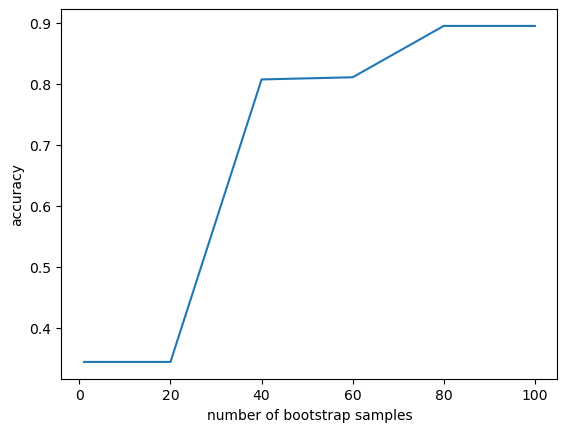

In [28]:
plt.plot(k_list, accuracy_list)
plt.xlabel('number of bootstrap samples')
plt.ylabel('accuracy')

In [29]:
""" (10 pts) """
# Calculating the components needed for the slope formula
n = len(k_list)
sum_x = np.sum(k_list)
sum_y = np.sum(accuracy_list)
sum_xy = np.sum(np.array(k_list) * np.array(accuracy_list))
sum_x_squared = np.sum(np.array(k_list)**2)

# Calculating the slope
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)

# slope should at least not be negative
assert m > -0.05